In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix

In [79]:
df = pd.read_csv("../input/applicants/applicant.csv",names=[
        "Age","Workclass","fnlwgt","Education","Education-Num","Marital Status",
        "Occupation","Relationship","Race","Gender","Capital Gain","Capital Loss",
        "Hours per week","Country","Target"],sep=r'\s*,\s*',
    engine='python',
    na_values='?')
df.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [80]:
df.isna().sum()

Age                  0
Workclass         1836
fnlwgt               0
Education            0
Education-Num        0
Marital Status       0
Occupation        1843
Relationship         0
Race                 0
Gender               0
Capital Gain         0
Capital Loss         0
Hours per week       0
Country            583
Target               0
dtype: int64

In [81]:
df.dropna(inplace = True)

In [82]:
df.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [83]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
columns = ["Marital Status","Occupation","Race","Gender","Country","Workclass","Target"]
for item in columns:
    df[item] = encoder.fit_transform(df[item])

In [84]:
df.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,5,77516,Bachelors,13,4,0,Not-in-family,4,1,2174,0,40,38,0
1,50,4,83311,Bachelors,13,2,3,Husband,4,1,0,0,13,38,0
2,38,2,215646,HS-grad,9,0,5,Not-in-family,4,1,0,0,40,38,0
3,53,2,234721,11th,7,2,5,Husband,2,1,0,0,40,38,0
4,28,2,338409,Bachelors,13,2,9,Wife,2,0,0,0,40,4,0


In [85]:
df.drop(columns = ["fnlwgt","Education","Relationship","Capital Gain","Capital Loss"], inplace = True)

In [86]:
df.head()

,Age,Workclass,Education-Num,Marital Status,Occupation,Race,Gender,Hours per week,Country,Target
0,39,5,13,4,0,4,1,40,38,0
1,50,4,13,2,3,4,1,13,38,0
2,38,2,9,0,5,4,1,40,38,0
3,53,2,7,2,5,2,1,40,38,0
4,28,2,13,2,9,2,0,40,4,0


<AxesSubplot:>

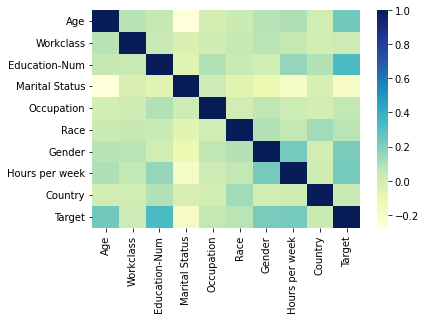

In [87]:
sns.heatmap(df.corr(),cmap = "YlGnBu", annot = False)

Text(0.5, 1.0, 'Race vs Age')

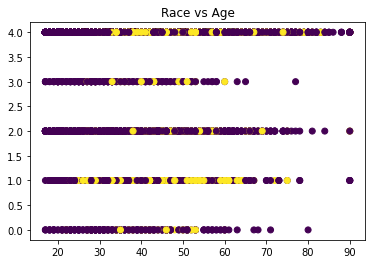

In [88]:
plt.scatter(df["Age"],df["Race"], c = df["Target"])
plt.title("Race vs Age")

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

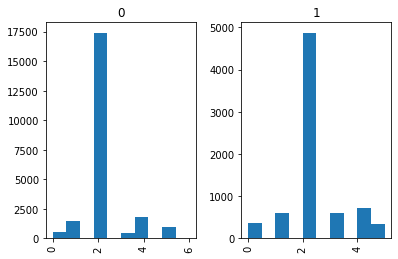

In [89]:
df["Workclass"].hist(by=df["Target"])

for both classes private workers are in majority

In [90]:
X = df.drop(columns = "Target")
y = df["Target"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

Score: 0.793966517487154


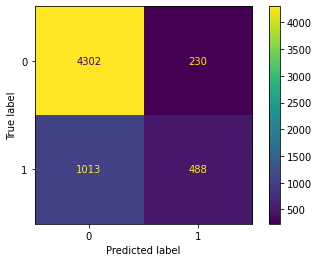

In [91]:
clf = SVC()
clf.fit(X_train,y_train)
print("Score:",clf.score(X_test,y_test))
plot_confusion_matrix(clf,X_test,y_test)

Score: 0.7941322725012432


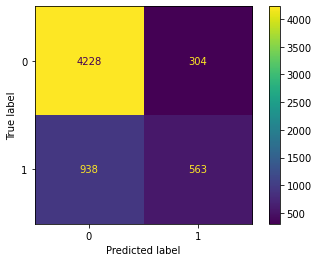

In [92]:
clf = SVC(kernel="linear")
clf.fit(X_train,y_train)
print("Score:",clf.score(X_test,y_test))
plot_confusion_matrix(clf,X_test,y_test)

Score: 0.7971158627548484


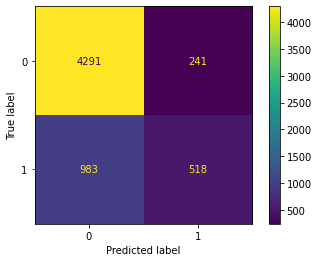

In [93]:
clf = SVC(kernel="poly")
clf.fit(X_train,y_train)
print("Score:",clf.score(X_test,y_test))
plot_confusion_matrix(clf,X_test,y_test)

In [ ]:
clf = SVC(kernel="sigmoid")
clf.fit(X_train,y_train)
print("Score:",clf.score(X_test,y_test))
plot_confusion_matrix(clf,X_test,y_test)